# Pós-graduação em Ciência da Computação - UFABC
## Projeto de Mineração de Dados - Professor Thiago Covões
### Alunos: Fernanda Borges e Thiago Rizuti

# Introdução

O objetivo do projeto é interpretar automaticamente captchas de áudio, que neste caso são áudios com quatro caracteres gravados pelos alunos separadamente e concatenados de forma aleatória em arquivos .wav.

Esta base foi crida considerando-se os seguintes caracteres: a,b,c,d,h,m,n,x,6,7. Ela contém 200 observações para o conjunto de treinamento e 147 observações para o conjunto de validação.

Primeiramente desenvolvemos classificadores capazes de distinguir cada caractere separadamente, sendo que cada caractere do captcha representa uma classe. Em seguida consideramos que para cada arquivo .wav recebido a predição é a combinação das predições individuais para cada caractere.

Para realizar este projeto foram usadas as bibliotecas:
- librosa, que é um pacote para análise de áudios e músicas; 
- pandas, que é uma ferramenta para estruturação e análise de dados;
- numpy, que é muito utilizada para computações científicas;
- matplotlib, que é utilizada principalmente para a plotagem de imagens em 2D;
- sklearn, que possui ferramentas para mineração de dados;

# Análise Exploratória

Para a extração das variáveis utilizamos o Mel Frequency Cepstral Coefficents (MFCCs) que é a ferramenta amplamente utilizada para reconhecimento automático de fala.

Os sons gerados por humanos são filtrados pelo formato do trato vocal incluindo a língua, os dentes, etc. Este formato determina como o som é emitido. Dado que é possível determinar acuradamente este formato, então temos uma representação acurada do fonema que está sendo reproduzido. 

O formato do trato vocal se manifesta em um envelope do espectro de força em um espaço curto de tempo, e o trabalho MFCCs é representar este envelope de maneira precisa.

O processamento do Mel-Frequency Cepstral Coefficients realiza primeiramente o janelamento e aplica a Transformada Discreta de Fourier (DFT). A amplitude da Transformada de Fourier é filtrada por janelas triangulares na escala Mel e então aplica-se o logaritmo. A Transformada Discreta de Cosseno é aplicada e os Coeficientes Mel-Cepstrais são as amplitudes resultantes.

O primeiro desafio foi segmentar cada captcha separando o áudio referente a cada caractere. Para isso utilizamos a função load da biblioteca librosa que retorna a série temporal do áudio e a taxa de amostragem dela. Observamos os espectrogramas de alguns captchas e identificamos que eles condiziam com o processo de gravação dos áudios, pois havia uma separação visual a cada dois segundos (eixo Time) entre as oscilações mais representativas (eixo Hz).

In [1]:
import librosa 
import librosa.display as display

import pandas as pd 
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
%matplotlib inline

import os

import time

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, chi2, SelectKBest, SelectPercentile
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [51]:
def read_captchas(path):
    wavs = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file)) and file.endswith('.wav')]
    captchas = []
    for wav in wavs:
        signal, sampling_rate = librosa.load(os.path.join(path,wav), None)
        label = wav.split('.wav')[0]
        captchas.append((signal,sampling_rate,label))
        
        plt.figure(figsize=(14, 5))
        plt.title(label)
        #Plot the amplitude envelope of a waveform.
        librosa.display.waveplot(signal, sr=sampling_rate)
        
        X = librosa.stft(signal)
        Xdb = librosa.amplitude_to_db(abs(X))
        plt.figure(figsize=(14, 5))
        #Display a spectrogram/chromagram/cqt/etc.
        librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
        
    return captchas

In [52]:
def split_characters(captchas):
    chars = [] 
    for captcha in  captchas:
        signal = captcha[0]
        sampling_rate=captcha[1]
        label=captcha[2]
        chars += [(signal[sampling_rate*2*i:sampling_rate*2*(i+1)],sampling_rate,label[i]) for i in range(4)]
    return chars

In [53]:
def extract_features(chars):
    data = pd.DataFrame()
    for j, char in enumerate(chars):
        signal = char[0]
        sampling_rate=char[1]
        label=char[2]  
        mfcc = librosa.feature.mfcc(signal,sampling_rate)
        

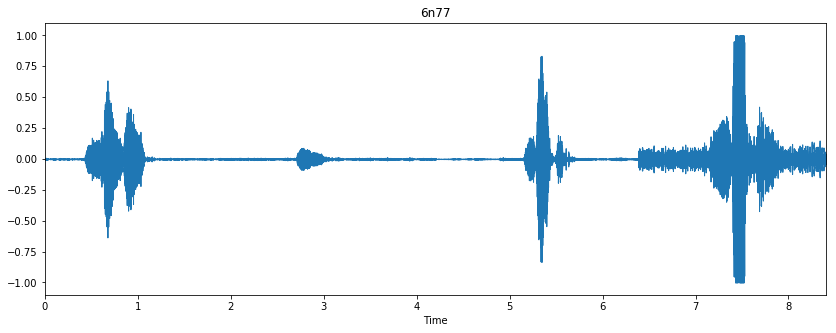

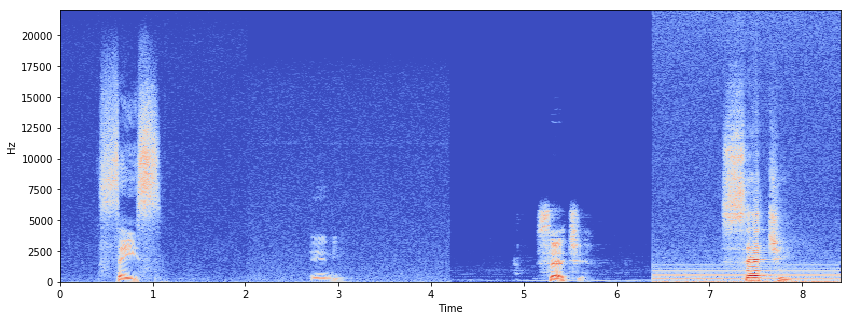

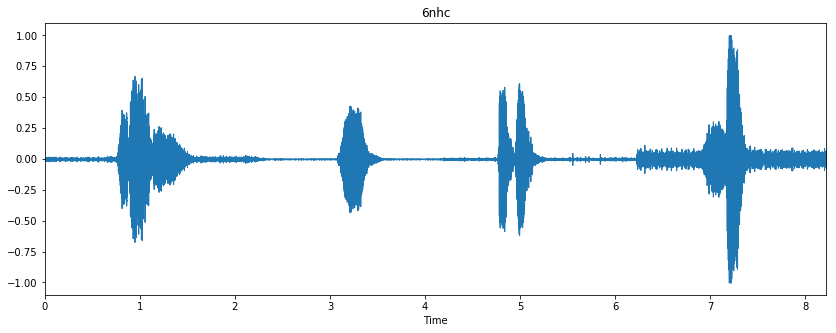

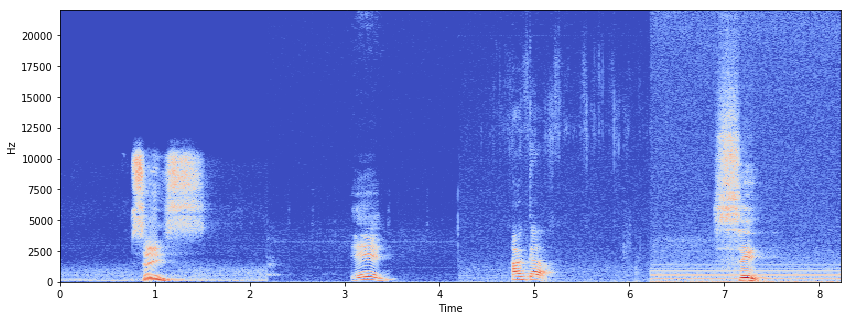

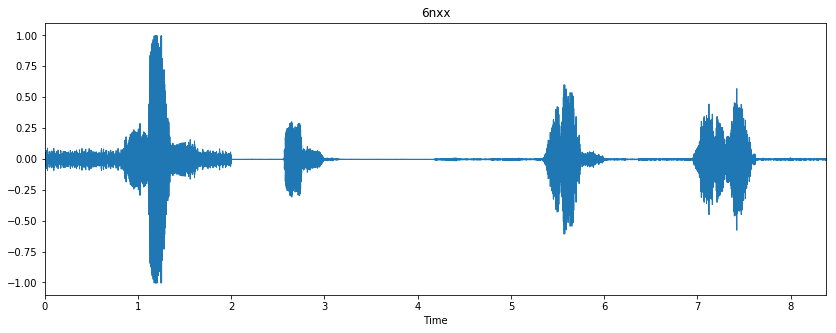

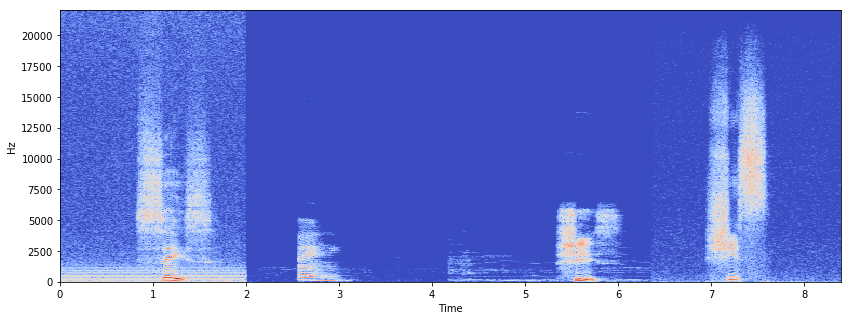

In [54]:
train_captchas = read_captchas('./amostra_comeca_6')

Decidimos então quebrar a série temporal de cada captcha em 4 intervalo de 2 segundos.

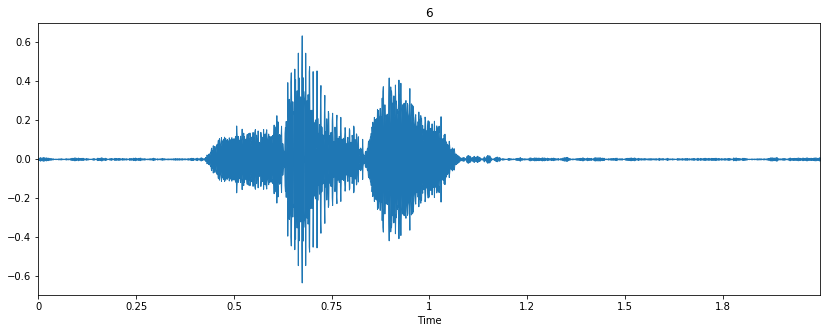

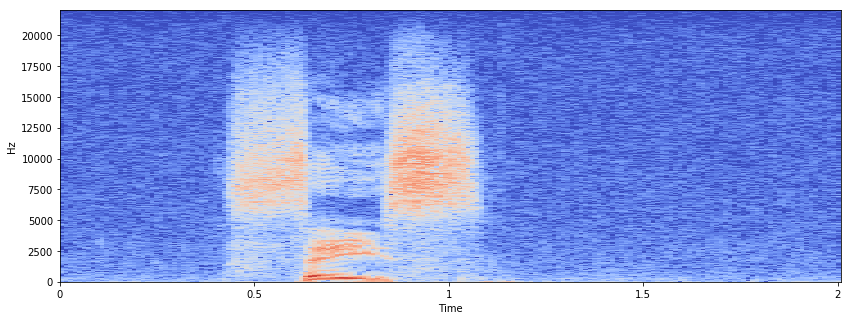

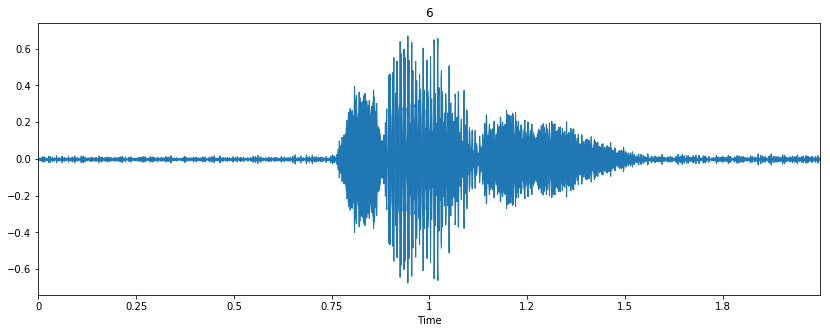

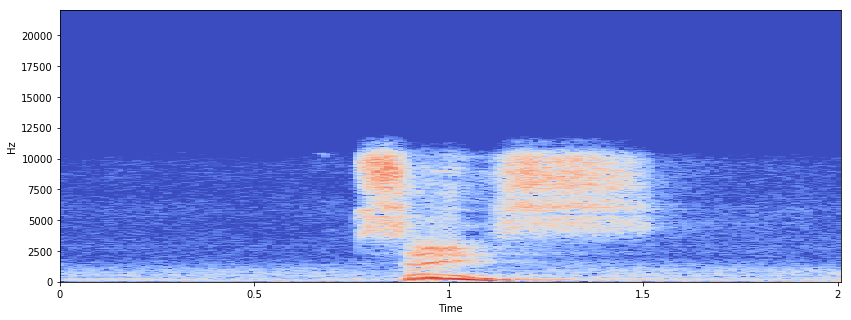

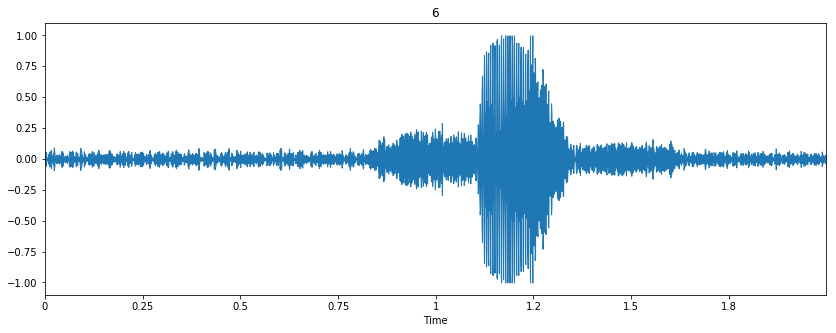

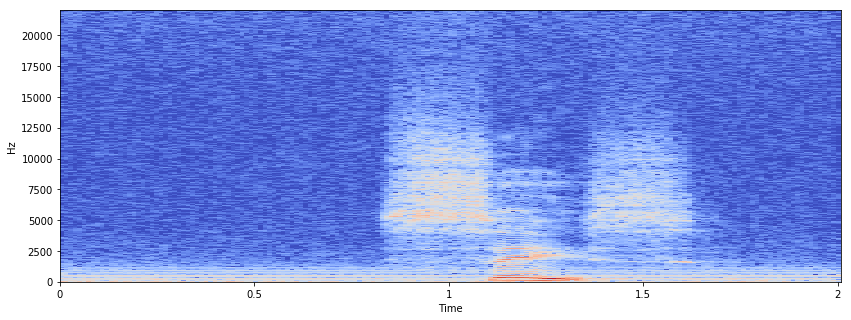

In [58]:
train_chars = split_characters(train_captchas)

for j, char in enumerate(train_chars):
    signal = char[0]
    sampling_rate = char[1]
    label = char[2]  
    if label == "6":
        plt.figure(figsize=(14, 5))
        plt.title(label)
        librosa.display.waveplot(signal, sr=sampling_rate)
        
        X = librosa.stft(signal)
        Xdb = librosa.amplitude_to_db(abs(X))
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')

## Referencias

http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
http://abricom.org.br/wp-content/uploads/2016/03/bricsccicbic2013_submission_55.pdf

http://abricom.org.br/wp-content/uploads/2016/03/bricsccicbic2013_submission_55.pdf